In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class LogisticRegression:
    def __init__(self, weights=None, lr=0.01, reg_coef=0.01):
        self.lr = lr
        self.w = weights if weights else np.zeros((21,1)) # np.random.randn(20,1)  21 because we added bias too.
        self.lanbda = reg_coef # lambda

    
    def sigmoid(self, x):
        z = np.dot(x, self.w)
        return 1 / (1 + np.exp(-z))
        
    
    def cost(self, x, y):
        eps = 0.00000000001 # just to prevent that y_hat might be 0 and log(0) is nan ! 
        y_hat = self.sigmoid(x)
        y_hat += eps 
        loss =  -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) + self.lanbda*np.sum((self.w)**2) # l2 Reg
        return loss

    def train(self, x, y):

        # according to wikipedia https://en.wikipedia.org/wiki/Cross-entropy
        # the derivative of cross-entropy is just  Σx(y_hat - y)
        y_hat = self.sigmoid(x)
        grads = np.dot(x.T, (y_hat - y)) + ( 2 * self.lanbda * self.w ) 
        self.w = self.w - (grads * self.lr)
        
    
    def predict(self, x):
        return self.sigmoid(x)

    def classify(self, x):
        return 1 if self.sigmoid(x) > 0.5 else 0


    def params(self):
        return self.w

In [22]:
df = pd.read_csv("Life Expectancy Data.csv") # Reading file
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [23]:
df = df.drop(columns="Country") # dropping categorical variable
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
status = df['Status'] # mapping target variable to 0 or 1 
target = []
for i in status:
    if i == 'Developing':
        target.append(0)
    else:
        target.append(1)

df['Status'] = target # replacing target variable with its mapping to 0 & 1
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [25]:
df = df.dropna() # handling missing values with droping them.
# df['constant Term'] = np.ones(df.shape[0])   # this is weird because when i add bias to our data before cleaning, it becomes NaN, in the process ! 
# TODO: Why?
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [26]:
df = df.sample(frac=1) # shuffling dataset

In [27]:
y = np.array(df['Status']).reshape(-1, 1) # take our dependant variable 
sample_status = df.iloc[1000]['Status']

In [28]:
df = df.drop(columns='Status')
df = (df - df.mean()) / df.std() # standardize data, because of big numbers
df['Constant Term'] = np.ones(df.shape[0])   # Adding constant (Bias) to our input
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Constant Term
1549,-0.939526,1.068304,-0.608212,-0.269374,1.957417,6.635336,0.577328,-0.220557,0.924934,-0.271459,...,0.975946,0.687920,-0.312294,6.112838,-0.207318,-0.837235,-0.861189,1.285982,0.493709,1.0
533,0.528289,-2.057820,1.562398,0.111272,-1.000994,-0.372550,-1.570718,-0.201322,-1.064511,0.219646,...,-1.307273,-2.092536,0.350797,-0.406893,-0.191099,0.989158,0.943805,-1.483167,-1.938869,1.0
1467,-0.450254,0.545389,-1.334408,-0.261099,-0.673385,-0.093447,-0.047558,-0.125770,1.178044,-0.265320,...,1.249932,-0.285240,-0.312294,-0.016850,-0.207321,-0.032753,-0.066132,0.554096,0.386390,1.0
2046,0.039017,0.704537,-1.230666,-0.252824,1.704265,-0.388385,0.733550,-0.220557,0.965432,-0.253043,...,0.401879,0.687920,-0.312294,-0.472694,0.333125,-0.576322,-0.560356,0.991043,1.030308,1.0
1615,-1.428797,0.283931,-0.352846,-0.269374,-0.641121,-0.394874,0.733550,-0.128745,-1.110071,-0.271459,...,-0.076509,0.641579,-0.312294,-0.482198,-0.207965,2.119782,2.104158,-0.188713,-0.042889,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,-0.694890,0.556757,-1.230666,-0.244549,-0.785070,-0.181591,0.694494,-0.219070,0.712322,-0.246904,...,-0.167838,0.641579,-0.312294,-0.206648,-0.206373,0.336875,0.299164,0.281005,0.636802,1.0
194,1.262196,0.192989,-0.265064,0.591217,-1.122607,-0.367288,0.655439,-0.197059,-1.069574,0.526586,...,-1.337716,0.548897,-0.312294,-0.402072,2.028340,2.924265,2.985166,-0.363492,-0.758353,1.0
1969,-0.694890,0.738640,-0.368806,-0.261099,0.247396,-0.042668,0.499217,-0.220557,-1.661851,-0.259181,...,0.662819,0.363533,-0.312294,-0.056595,-0.203237,-0.598065,-0.603332,0.592329,0.279070,1.0
2682,1.506831,0.704537,-1.206726,-0.136975,-0.765215,-0.293916,0.655439,-0.164538,1.375470,-0.154822,...,-0.237422,0.548897,-0.312294,0.571737,-0.196990,0.010733,-0.044644,0.696104,0.851442,1.0


In [29]:
test_sample = df.iloc[1000]

In [30]:
# when adding the constant term after data cleaning is done, its makes our loss much better !
# TODO: @Question? as Jeremy told: we always add this 1 vector to our input as bias, but shouldnt it be some other values rather than 1?
# Answer: it should be 1, because when our model finds its optimal param, that parameter will multiply by 1 and our final function has the optimal bias
# and everything works as it should! 
# @Note ToMyself: always add 1 vector to input ! this one was a good example of showing importance of bias


In [31]:
x = np.array(df)

In [32]:
validation_breakpoint = int(np.floor((x.shape[0] * 0.8))) #Splitting data into train & valid
x_train = x[:validation_breakpoint]
y_train = y[:validation_breakpoint]
x_valid = x[validation_breakpoint:]
y_valid = y[validation_breakpoint:]

In [33]:
print(x.shape, y.shape)

(1649, 21) (1649, 1)


In [34]:
# logistic = LogisticRegression(lr=0.001234)
logistic = LogisticRegression(lr=0.0001, reg_coef=0.0001)   
# logistic = LogisticRegression(lr=0.00123, reg_coef=0.00123)


In [35]:
# After Adding the bias term to the equations it got much better! thats crazy. from 0.5 loss to 0.15 !
# TODO: @Question? why adding just a constant term made our loss much better and our model was more accurate?

print(logistic.cost(x_train, y_train))

0.6931471805740014


In [36]:
loss_valid = []
loss_train = []
for i in range(1000):
    loss_train.append(logistic.cost(x_train, y_train))
    loss_valid.append(logistic.cost(x_valid, y_valid))
    logistic.train(x_train, y_train)
    if (i + 1) % 100 == 0:
        print("Epoch:", i+1, "Train:", logistic.cost(x_train, y_train), "Valid: ", logistic.cost(x_valid, y_valid))


Epoch: 100 Train: 0.2219725835638032 Valid:  0.25007440926260965
Epoch: 200 Train: 0.1870783775682105 Valid:  0.21278979246025512
Epoch: 300 Train: 0.17280791405910148 Valid:  0.19767087386843737
Epoch: 400 Train: 0.16487837889547505 Valid:  0.18958684872172576
Epoch: 500 Train: 0.15979201928259834 Valid:  0.18459428452743612
Epoch: 600 Train: 0.1562437285772633 Valid:  0.18122802501130367
Epoch: 700 Train: 0.1536286330387747 Valid:  0.17882548123618638
Epoch: 800 Train: 0.15162482955804102 Valid:  0.17704217845320894
Epoch: 900 Train: 0.15004388468833052 Valid:  0.17568021031668782
Epoch: 1000 Train: 0.148767587890683 Valid:  0.174617272308067


In [37]:
output = logistic.classify(np.array(test_sample))
print(f"Result of sigmoid of test_sample which is captured randomly each time {logistic.predict(np.array(test_sample))}, Actuacl y: {sample_status}, Predicted y: {output}")


Result of sigmoid of test_sample which is captured randomly each time [0.89973245], Actuacl y: 1.0, Predicted y: 1


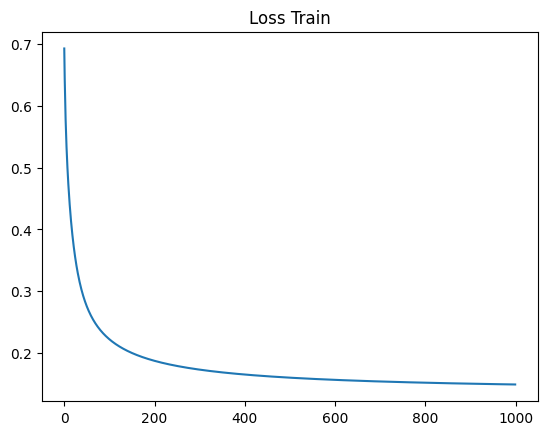

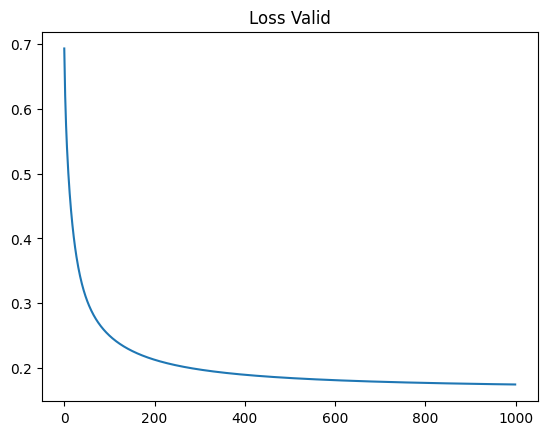

In [38]:
plt.ion()
plt.figure()
plt.title("Loss Train")
plt.plot(loss_train)
plt.show()

plt.figure()
plt.title("Loss Valid")
plt.plot(loss_valid)
plt.show()


plt.pause(0)